In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
#import csv files in pandas dataframes
chicago_collision = pd.read_csv("Bird_building_collisions\Chicago_collision_data.csv")

In [3]:
#Print first 5 rows from each table
print(chicago_collision.head())

        Genus  Species        Date Locality
0  Ammodramus  nelsoni  1982-10-03       MP
1  Ammodramus  nelsoni  1984-05-21      CHI
2  Ammodramus  nelsoni  1984-05-25       MP
3  Ammodramus  nelsoni  1985-10-08       MP
4  Ammodramus  nelsoni  1986-09-10       MP


In [4]:
genus_collisions = chicago_collision["Genus"].value_counts()

In [5]:
print(chicago_collision["Date"].max())
print(chicago_collision["Date"].min()) 

2016-11-30
1978-09-15


In [6]:
#Adding year column
chicago_collision["year"] = pd.DatetimeIndex(chicago_collision['Date']).year

In [7]:
chicago_collision.head()

,Genus,Species,Date,Locality,year
0,Ammodramus,nelsoni,1982-10-03,MP,1982
1,Ammodramus,nelsoni,1984-05-21,CHI,1984
2,Ammodramus,nelsoni,1984-05-25,MP,1984
3,Ammodramus,nelsoni,1985-10-08,MP,1985
4,Ammodramus,nelsoni,1986-09-10,MP,1986


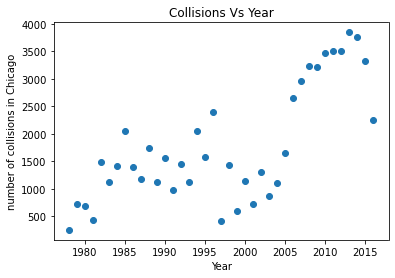

In [8]:
#Scatterplot of the number of collisions in Chicago by year
chicago_yearly_collisions = chicago_collision["year"].value_counts()
chicago_yearly_collisions.plot(style='o')
plt.style.use("grayscale")
plt.xlabel("Year")
plt.ylabel("number of collisions in Chicago")
plt.title("Collisions Vs Year")
plt.show()

In [9]:
#creating dataframe of bird collisions in chicago per year from chicago_yearly_collisions series
chicago_yr_collision_df=pd.DataFrame({'year':chicago_yearly_collisions.index, 'collision_count':chicago_yearly_collisions.values})
#sorting by year
chicago_yr_collision_df_sorted = chicago_yr_collision_df.sort_values(by="year")
#resetting index values
chicago_yr_collision_df_sorted.reset_index(drop=True,inplace=True)

In [10]:
#Linear regression of number of collisions over years
xs = chicago_yr_collision_df_sorted["year"]
ys = chicago_yr_collision_df_sorted["collision_count"]
res = linregress(xs,ys)
print(res)

LinregressResult(slope=67.7825910931174, intercept=-133572.5010796221, rvalue=0.7333226790048714, pvalue=1.0977506888588125e-07, stderr=10.331299209195937, intercept_stderr=20631.93216744485)


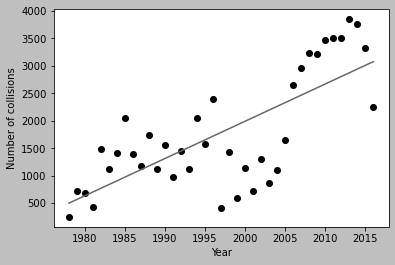

In [11]:
# Line of best fit
plt.plot(xs,ys,'o')
fx = np.array([xs.min(),xs.max()])
fy = fx * res.slope + res.intercept
plt.plot(fx,fy,'-')
plt.xlabel("Year")
plt.ylabel("Number of collisions")
plt.show()